# Video games success research

**Research task:**

For the online game shop, we need to identify the patterns that determine the success of the game. 

**Research goal:**

Plan an advertising campaign for 2017, based on data up to 2016. 


**Research plan:**
 
[**1. Data preprocessing**](#first)
- [1.1. Load libraries, load and check datasets](#first1)
- [1.2. Check data for duplicate and missing values](#first2)
- [1.3. Working with missing data](#first3)
- [1.4. Check data types](#first4)
- [1.5. Preprocessing conclusions](#first5)

[**2. EDA**](#second)
- [2.1. Years and periods](#second1)
- [2.2. Total amount of games](#second2)
- [2.3. Platforms](#second3)
- [2.4. Top-5 platforms](#second4)
- [2.5. Top-5 platforms in time](#second5)
- [2.6. Distribution graphs](#second6)
- [2.7. Dependence on critic and user ratings](#second7)
- [2.8. Genres](#second8)
- [2.9. EDA conclusions](#second9)


[**3. User portrait of each region**](#third)
- [3.1. Platforms in different regions](#third1)
- [3.2. Genres in different regions](#third2)
- [3.3. Impact of ESRB rating in regional sales](#third3)
- [3.4. Conclusions on user portraits  of the 3 regions](#third4)

[**4. Hypothesis testing**](#fourth)
- [4.1. The average user ratings of the XOne and PC platforms are the same](#fourth)
- [4.2. The average user for the Action and Sports genres are the same](#fourth)
- [4.3. Hypotheses conclusions](#fourth)

[**5. General conclusions and recommendations**](#fifth)

# 1. Data preprocessing<small><i><a href='http://ecotrust-canada.github.io/markdown-toc/'>Table of contents generated with markdown-toc</a></i></small>


We work with a dataframe from open sources, there is historical data on game sales, user and expert ratings, genres and platfroms. 

Let's start to get aquainted with the data and prepare it in the process. 


Note: 

We have in the data the abbreviation ESRB (Entertainment Software Rating Board), which is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it in an age category, for example "Adults only 18+", "Teen", "Everyone".

<div id='first1'/> 

## 1.1. Load libraries, load and check datasets 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from scipy import stats as st

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
palette = ['#5F9F9F', '#0D5661', '#F2C3B2', '#45042B', '#C1839F', 
           '#15616D', '#ACE0F9', '#BBB5D3', '#1F8AC7', '#74BDEF']
sea.set_palette(palette=palette)
sea.set_style("whitegrid")

In [4]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('/Users/lqbaha/Downloads/datasets/games.csv')

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [6]:
data.shape[0]

16715

First let's rename the columns, bringing everything to lower case.

And create a `total_sales` column, where we save the worldwide sales. 

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data["total_sales"] = data["na_sales"] + data["eu_sales"] + data["jp_sales"] + data["other_sales"]

## 1.2. Check data for duplicate and missing values<a class="anchor" id="first2"></a>

Check the data for missing values (quantitavely and as a percentage). 

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

In [10]:
round(data.isna().mean()*100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
total_sales         0.00
dtype: float64

In [11]:
data.duplicated().sum()

0

Let's take a look at data, which has missing values. 

In [12]:
data[data["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [13]:
data[data["year_of_release"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


## 1.3. Working with missing data<a class="anchor" id="first3"></a>

* The two rows with missing game name can be deleted, the games are old and there are to many gaps in the rest of the columns. 

* We found that the column of user ratings has the value "tbd" aka "to be determined / decided / declared", so it means we don't have this data yet. It makes more sense to convert it to the NaN, and then work with it rather than with a string. 

* The gaps in the year of release column will be handled complexly, we will delete the rows having missing values in several columns at once. The rest will be left as it is. 

* We will leave the missing values in critics and usres ratings to NaN. Even though there are a lot of them, we will work with what we have (if we fill in categorically by year, sales or genre - there is a high probability of over-averaging the data we have). 

* The missing value in the rating column will be covered by dummy vairable, to see how many games are released without rating (yes, the ESRB is a big company, but ut has a maximum infuence on America and Canada, but there are completely different regions in our dataframe).

In [14]:
data["rating"] = data["rating"].fillna(value= "No ESRB")

In [15]:
data = data.dropna(subset=["name"])

In [16]:
data.loc[data["user_score"] == "tbd", "user_score"] = np.nan

In [17]:
data_filtred = data.dropna(subset=["year_of_release"])

In [18]:
print("Acceptable percentage of data loss for data filtering:", 
        round(((data.shape[0] - data_filtred.shape[0]) /  data.shape[0])*100), "%")

Acceptable percentage of data loss for data filtering: 2 %


## 1.4. Check data types.<a class="anchor" id="first4"></a>

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.7+ MB


Convert the column data to the correct types: 

* `year_of_release` into **int**
* let's leave the data in the `na_sales`, `eu_sales` and `jp_sales` columns as they are, as the values are in millions of copies sold
* `critic_score` - remove the digits after the comma, because our score is on a 100-point scale, and this information is not so important
* but in the `user_score` column we convert it to **float**, because the grade is already 10 points, and the values after the decimal point are important to us. 
* we are leaving columns `name`, `platform`, `genre` and `rating` in the same format as they were. 

In [20]:
data_filtred["critic_score"] = data_filtred["critic_score"].astype(int, errors="ignore") 

In [21]:
data_filtred["user_score"] = data_filtred["user_score"].astype(float, errors="ignore") 

In [22]:
data_filtred["year_of_release"] = data_filtred["year_of_release"].astype(int, errors="ignore")

In [23]:
data_filtred

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No ESRB,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,No ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,No ESRB,0.01


## 1.5. Preprocessing conclusions<a class="anchor" id="first5"></a>

We got the dataframe with a huge number of missing values, which we can't even process without shifthing the estimates. And also we have a massive time period - from 1980 till 2016 which gives us 36 years. 

The necessary data may have been lost in technical phases (like the `year_of_release`), or there may have been a failure to merge the tables with the information and with the ratings. 

And it's also possible that ratings (and critics and users) were introduced only at the certain moment, and before that everyone just played (unrated). So the ESRB only appeared in 1994. But human factor can never be ruled out.  

In the end, we need to learn to work with what we have, while staying objective. 

## 2. EDA.<a class="anchor" id="second"></a>

## 2.1. Years and periods<a class="anchor" id="second1"></a>

We will find out how many games were released in different years, estimate and identify the actual period on which we will futher base our analysis.  

Let's take a look at our parameters of dataframe. 

In [24]:
print("First year of reference:", int(data_filtred["year_of_release"].min()))
      
print("Last year of reference:", int(data_filtred["year_of_release"].max()))

First year of reference: 1980
Last year of reference: 2016


We count the years from 1980 to 2016, and this is a whole 36 years of rapidly developing history of the creation of video games, and comparing games from 1995 and 2015 is not quite right. 

So let's create categories of six years each: 
   * 1980 - 1986
   * 1986 - 1992
   * 1992 - 1998
   * 1998 - 2004
   * 2004 - 2010
   * 2010 - 2016

In [25]:
# create a function that assigns the year of the game to a period in years 

def period(year):
    if 1980 <= year <= 1986:
        return "1980 - 1986"
    if 1986 < year <= 1992:
        return "1986 - 1992"
    if 1992 < year <= 1998:
        return "1992 - 1998"
    if 1998 < year <= 2004:
        return "1998 - 2004"
    if 2004 < year <= 2010:
        return "2004 - 2010"  
    if 2010 < year <= 2016:
        return "2010 - 2016"

In [26]:
data_filtred["period"] = data_filtred["year_of_release"].apply(period) 

In [27]:
data_filtred["period"].value_counts()

2004 - 2010    7250
2010 - 2016    4022
1998 - 2004    3536
1992 - 1998    1331
1980 - 1986     157
1986 - 1992     148
Name: period, dtype: int64

And let's look at the graphs at once. 

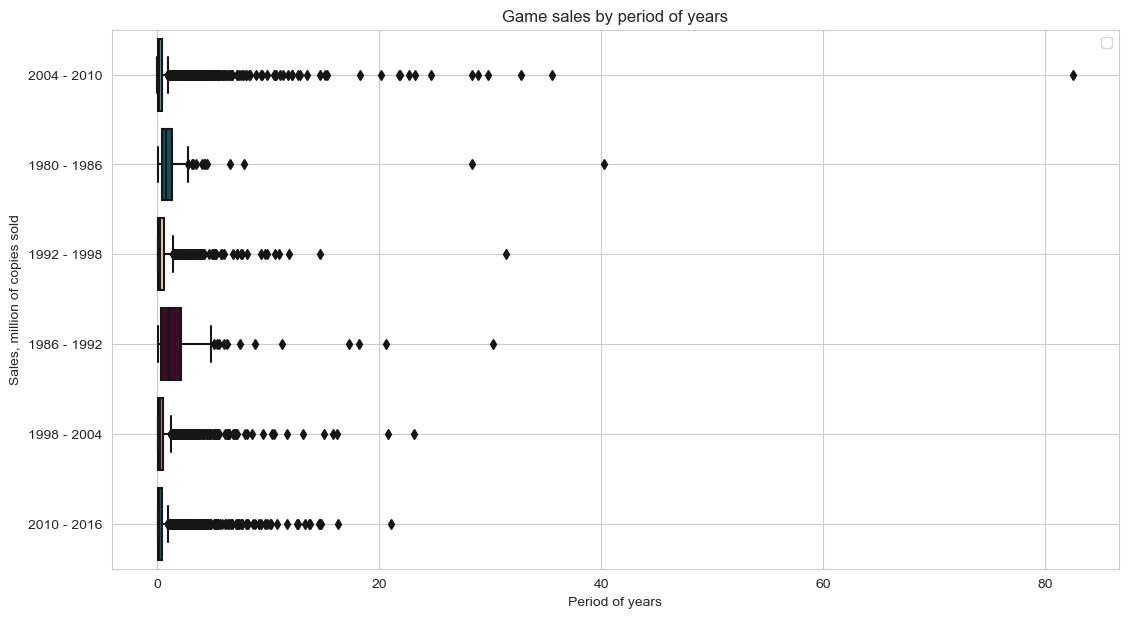

In [28]:
plt.figure(figsize=(13,7))
sea.boxplot(x=data_filtred["total_sales"], y=data_filtred["period"])
plt.title("Game sales by period of years")
plt.xlabel("Period of years")
plt.ylabel("Sales, million of copies sold")
plt.legend("")
plt.grid(True)
plt.show()

In [29]:
data_filtred[data_filtred["total_sales"] == data_filtred["total_sales"].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,period
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2004 - 2010


I even wondered what our biggest outlier was - a sport simulator (video games + sports, what could be better), which has really became a record-breaker in terms of awards as well! 

In fact, the period 2004-2010 was a very productive one for games. 

But we also see that a lot of games are selling very poorly, and a lot of data has accumulated around zero. 

## 2.2. Total amount of games<a class="anchor" id="second2"></a>

Now let's look at the number of games produced. 

In [30]:
data_filtred.pivot_table(
    index= "period", values= "name", aggfunc= ["count"])

,count
,name
period,
1980 - 1986,157
1986 - 1992,148
1992 - 1998,1331
1998 - 2004,3536
2004 - 2010,7250
2010 - 2016,4022


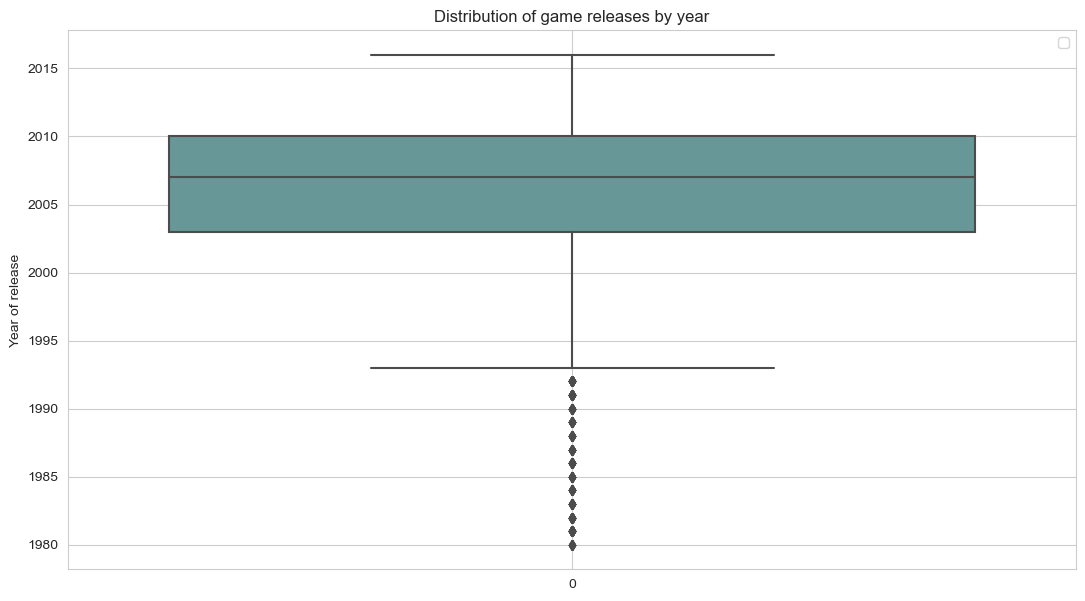

In [31]:
plt.figure(figsize=(13,7))
sea.boxplot(data=data_filtred["year_of_release"])
plt.title("Distribution of game releases by year")
plt.ylabel("Year of release")
plt.legend("")
plt.grid(True)
plt.show()

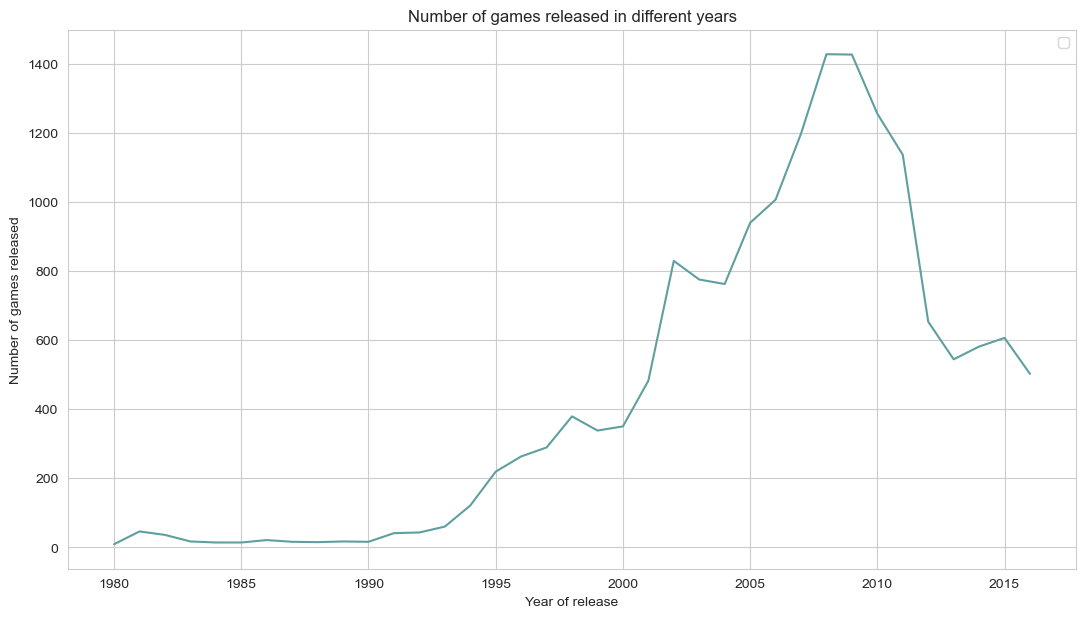

In [32]:
period_of_games = data_filtred.pivot_table(index="year_of_release", values="name", aggfunc="count")
plt.figure(figsize=(13,7))
sea.lineplot(data=period_of_games)
plt.title("Number of games released in different years")
plt.xlabel("Year of release")
plt.ylabel("Number of games released")
plt.grid(True)
plt.legend("")
plt.show()

We see, that distribution is normal, with peaks in 2008-2009. And with a decline in the following years (the reason seems to be the total popularity of smartphones and games on them, and you don't need a consoles when you have a Doodle Jump in your pocket without any consoles). 

And we will cut out old games that, although historically important, disturb our analysis.  

Next, we will take the countdown from 2012 (the Mass Effect 3 and Diablo 3). 

## 2.3. Platforms<a class="anchor" id="second3"></a>

And let's take a look at the gaming platforms.

In [33]:
sales_of_platform = data_filtred.pivot_table(
    index="platform", values="total_sales", aggfunc="sum").sort_values(by="total_sales", ascending=False)

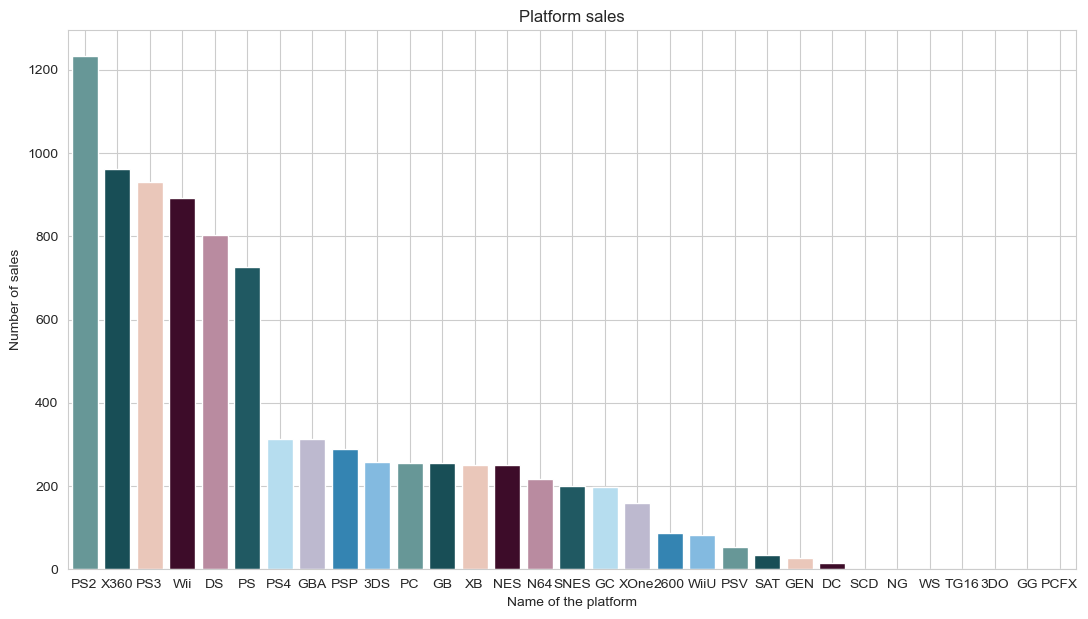

In [34]:
plt.figure(figsize=(13,7))
sea.barplot(x=sales_of_platform.index,y=sales_of_platform["total_sales"], palette=palette)
plt.title("Platform sales")
plt.xlabel("Name of the platform")
plt.ylabel("Number of sales")
plt.grid(True)
plt.show()

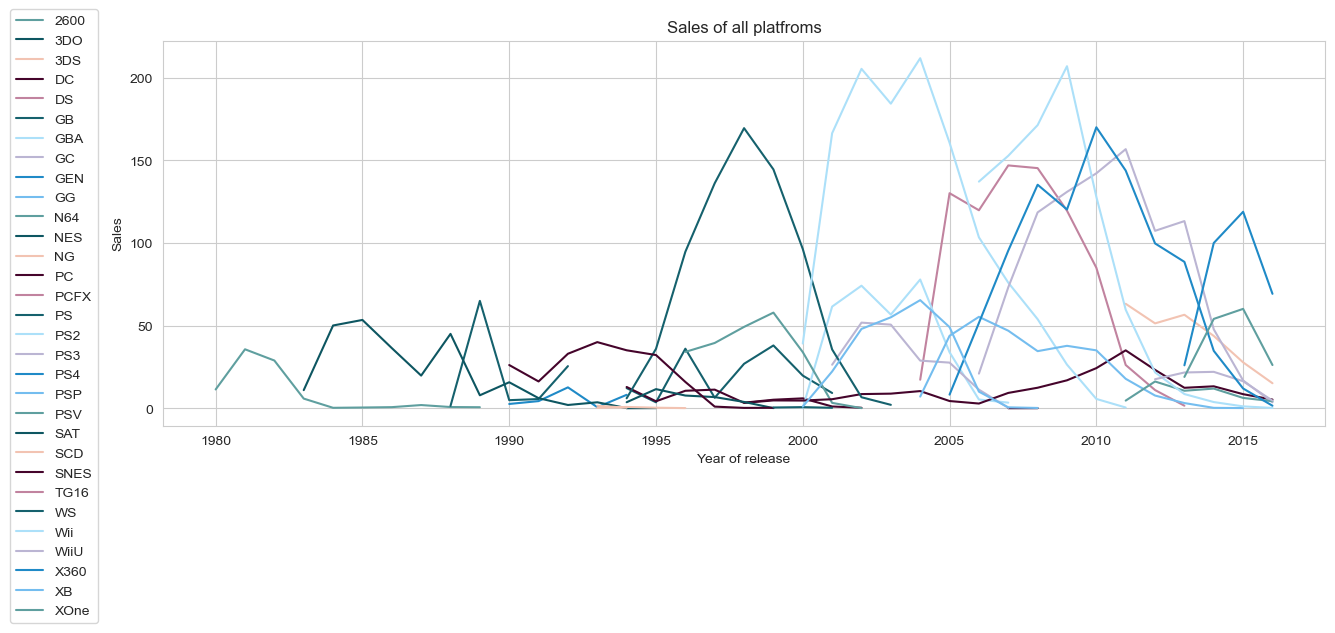

In [35]:
pd.pivot_table(
    data_filtred , 
    index="year_of_release", 
    columns="platform", 
    values="total_sales", 
    aggfunc="sum").plot(figsize=(15,5))

plt.title("Sales of all platfroms")
plt.xlabel("Year of release")
plt.ylabel("Sales")
plt.legend(loc="best", bbox_to_anchor=(-0.05, 1.1))
plt.grid(True)
plt.show()

From 1980 to 1995 games on consoles were not that popular, but with the introduction of the Play Station everything changed, and the release of games increased by 3-4 times. 

But the life cycle of gaming platforms themselves is about 10 years. 

The peak of sales comes about 3-5 years after the release.  

Of course, there are still consoles from the same brand that release their own updated versions, which completes the 'career' of their predecessor.  

The Nintendo Wii platform had a big jumo right after it was released, but also a big drop right away. 

## 2.4. Top-5 platforms<a class="anchor" id="second4"></a>


Now let's bring out the top-5 gaming platforms of all time. 

In [36]:
pvt_platform = data_filtred.pivot_table(
    index= "platform", values= ["period"], aggfunc= ["count"])

pvt_platform = pvt_platform.sort_values([("count", "period")], ascending=False)
pvt_platform.head(5)

,count
,period
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232


Found our leaders in sales and perfomance:

- 1 - PS2 (Playstation from Sony, released in 2000) 
- 2 - DS (Nintendo, pocket game console, year 2004)
- 3 - PS3 (Playstation from Sony, an improved version of PS2, released in 2006)
- 4 - Wii (also Nintedo, released in 2006) 
- 5 - X360 (PS's main competitor, the Microsoft console, released in 2005)

Now let's take a look at the graph of the distribution by year. 

## 2.5. Top-5 platforms in time<a class="anchor" id="second5"></a>

In [37]:
top_5_platforms = data_filtred.query('platform == ["PS2", "DS", "PS3", "Wii", "X360"]')
top_5_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,period
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,2004 - 2010
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,2004 - 2010
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,2004 - 2010
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,2004 - 2010
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,2004 - 2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01,2004 - 2010
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01,2004 - 2010
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,No ESRB,0.00,2004 - 2010
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01,2010 - 2016


In [38]:
top_5_platforms["total_sales"].describe()

count    8072.000000
mean        0.597138
std         1.795539
min         0.000000
25%         0.080000
50%         0.190000
75%         0.530000
max        82.540000
Name: total_sales, dtype: float64

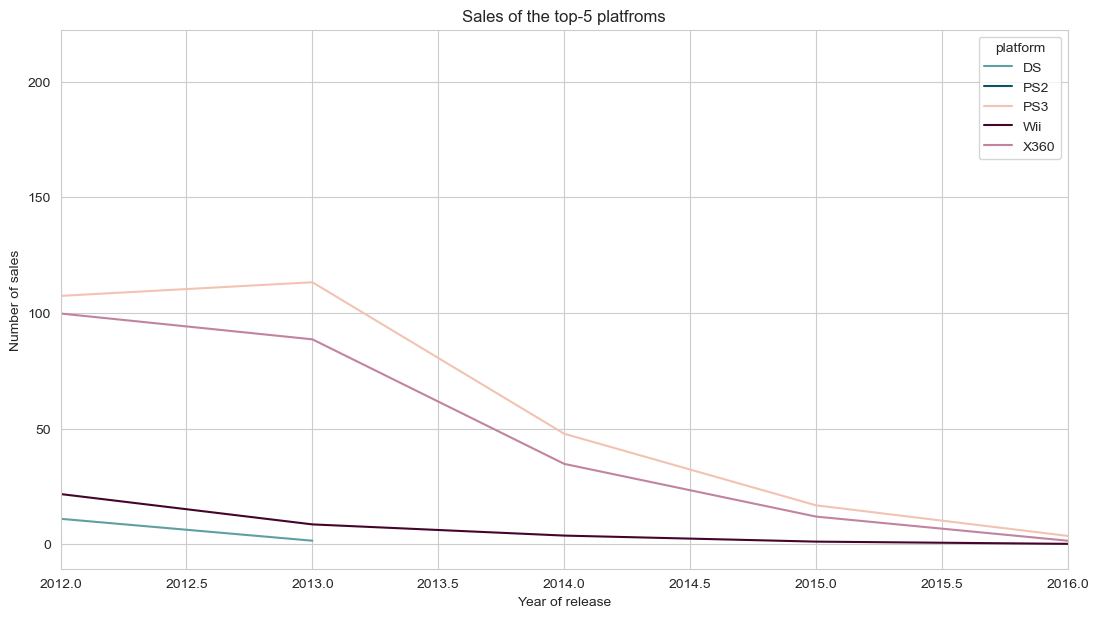

In [39]:
pd.pivot_table(
    top_5_platforms , index="year_of_release", columns="platform", values="total_sales", aggfunc="sum").plot(
    figsize=(13,7), xlim=(2012, 2016))
plt.grid(True)
plt.title("Sales of the top-5 platfroms")
plt.xlabel("Year of release")
plt.ylabel("Number of sales")
plt.show()

For the current period we will take data from 2012, when the peak for popularity of gaming platforms has already passed, and the reality has already changed.

In [40]:
data_filtred = data_filtred[data_filtred["year_of_release"] >= 2012]

Now let's check the most potentially profitable platforms against the current period and take a look at ther dynamics. 

In [41]:
data_filtred_2012 = data_filtred.groupby(["platform"]).agg({"total_sales":"sum"})
display(data_filtred_2012.sort_values(by="total_sales", ascending=False).head(15))

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


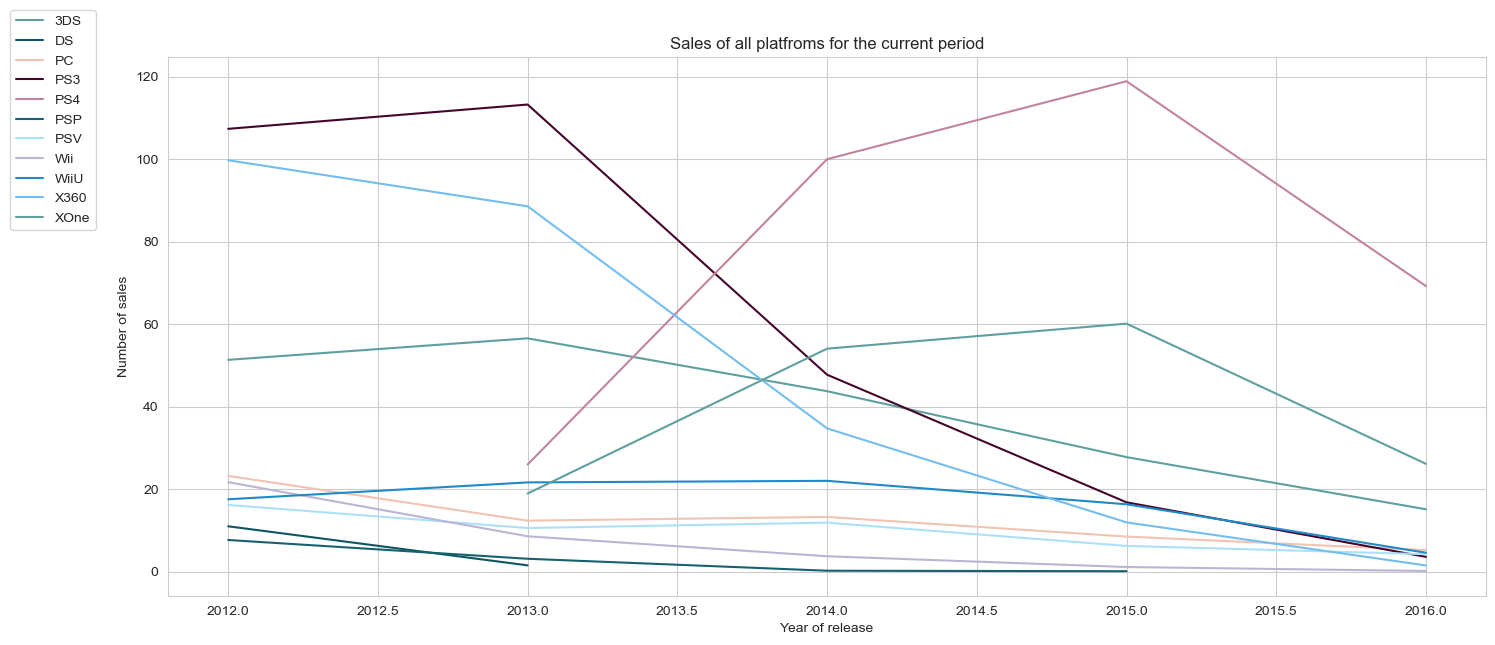

In [42]:
pd.pivot_table(
    data_filtred , 
    index="year_of_release", 
    columns="platform", 
    values="total_sales", 
    aggfunc="sum").plot(figsize=(17,7))

plt.title("Sales of all platfroms for the current period")
plt.xlabel("Year of release")
plt.ylabel("Number of sales")
plt.legend(loc="best", bbox_to_anchor=(-0.05, 1.1))
plt.grid(True)
plt.show()

At the end of 2016 (as we need a prediction for 2017), the following platfroms are in the lead: 
   * PS4 (almost new, came our after the PS3, and the time of releasing even newer has not yet come)
   * XOne (next after the X360)
   * 3DS 

The other platfroms have about the same low sales. 

It makes sense to wait for a new console from Nintendo (remember the Wii schedule). 


Now let's take a look at the distribution graphs. 

## 2.6. Distribution graphs<a class="anchor" id="second6"></a>

In [43]:
top_5_platforms_actual = top_5_platforms[top_5_platforms["year_of_release"] >= 2012]
top_5_platforms_actual = data_filtred.query('platform == ["PS4", "XOne", "3DS", "X360"]')

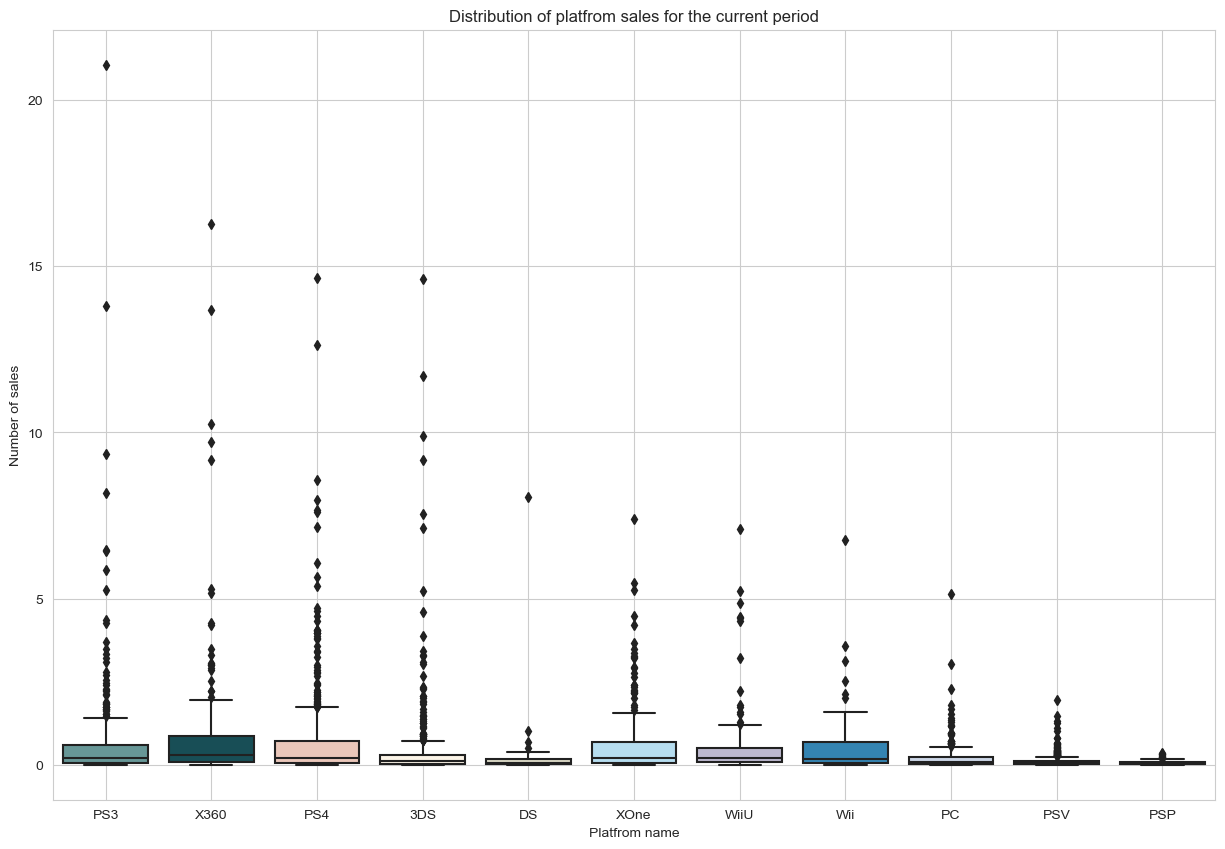

In [106]:
plt.figure(figsize=(15,10))
sea.boxplot(data=data_filtred, x="platform", y="total_sales", palette=palette)
plt.title("Distribution of platfrom sales for the current period")
plt.xlabel("Platfrom name")
plt.ylabel("Number of sales")
plt.grid(True)
plt.show()

DC and PC have the lowest sales. 

We see that almost all gaming platform have many ultra popular games - there are our outliers, let's remove them from the graph.

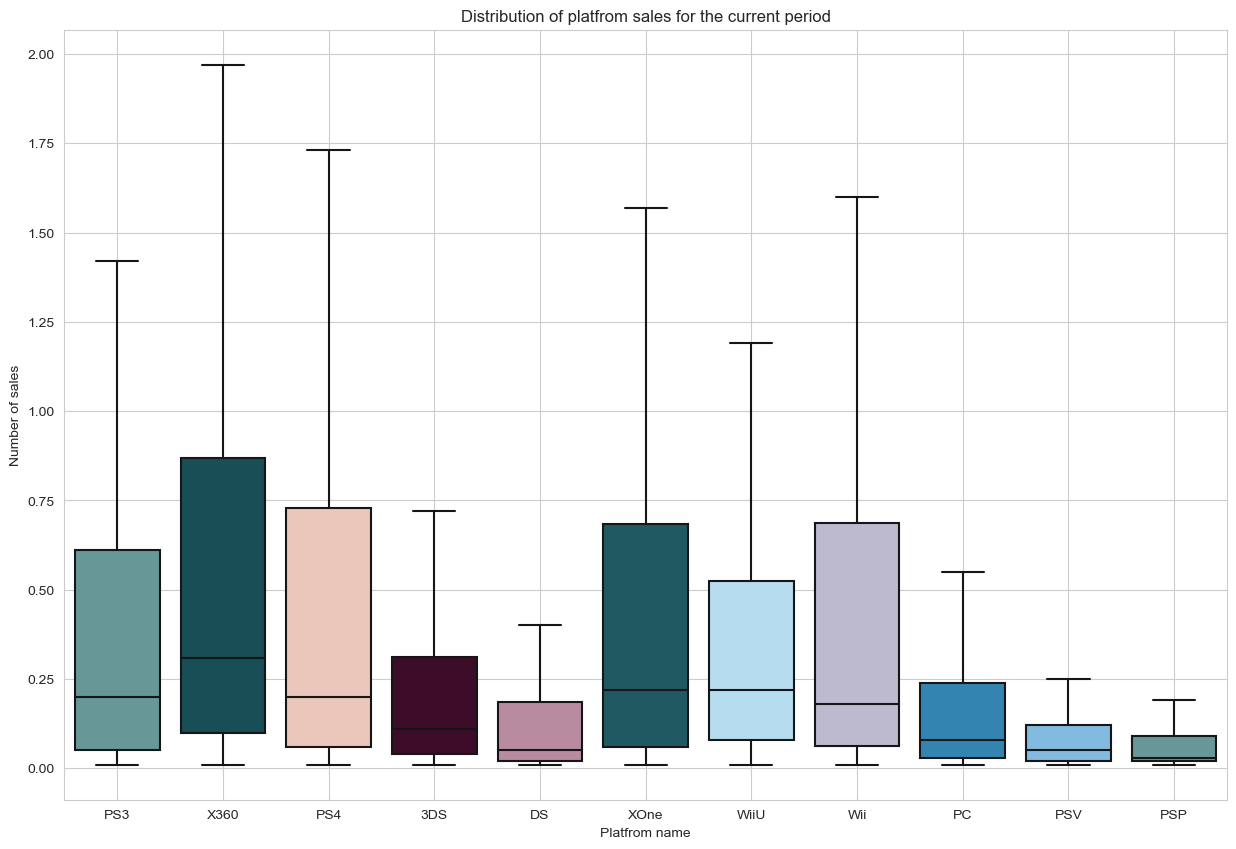

In [45]:
plt.figure(figsize=(15,10))
sea.boxplot(data=data_filtred, x="platform", y="total_sales", sym='', palette=palette)
plt.title("Distribution of platfrom sales for the current period")
plt.xlabel("Platfrom name")
plt.ylabel("Number of sales")
plt.grid(True)
plt.show()

The medians of our current platfroms are in a decent range.

The PS4, XOne and Wii platfroms' graphs are similar to each other in terms of total value, median and upper edge. 

The X360 - the median is the highest and the upper bound is also higher than the others. 

PC games cost less than any console. 

## 2.7. Dependence on critic and user ratings<a class="anchor" id="second7"></a>

Now let's examine how reviews, whether by users or criticts, affect the sales of one popular console. 
For example, take the X360 platfrom, we had it in the top-5 of all time and in the top-4 prospective platforms.

And to begin with, let's filter the data we need. 

In [46]:
data_X360 = data_filtred[(data_filtred["platform"] == "X360")]
data_X360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,period
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27,2010 - 2016
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68,2010 - 2016
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24,2010 - 2016
66,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.0,7.0,M,9.71,2010 - 2016
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,No ESRB,9.18,2010 - 2016


In [47]:
data_X360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 23 to 16654
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             292 non-null    object 
 1   platform         292 non-null    object 
 2   year_of_release  292 non-null    int64  
 3   genre            292 non-null    object 
 4   na_sales         292 non-null    float64
 5   eu_sales         292 non-null    float64
 6   jp_sales         292 non-null    float64
 7   other_sales      292 non-null    float64
 8   critic_score     171 non-null    float64
 9   user_score       235 non-null    float64
 10  rating           292 non-null    object 
 11  total_sales      292 non-null    float64
 12  period           292 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 31.9+ KB


In [48]:
print(
    "Correlation coefficient of critics' scores and sales: ", round(
        data_X360["critic_score"].corr(data_X360["total_sales"]),2))

Correlation coefficient of critics' scores and sales:  0.36


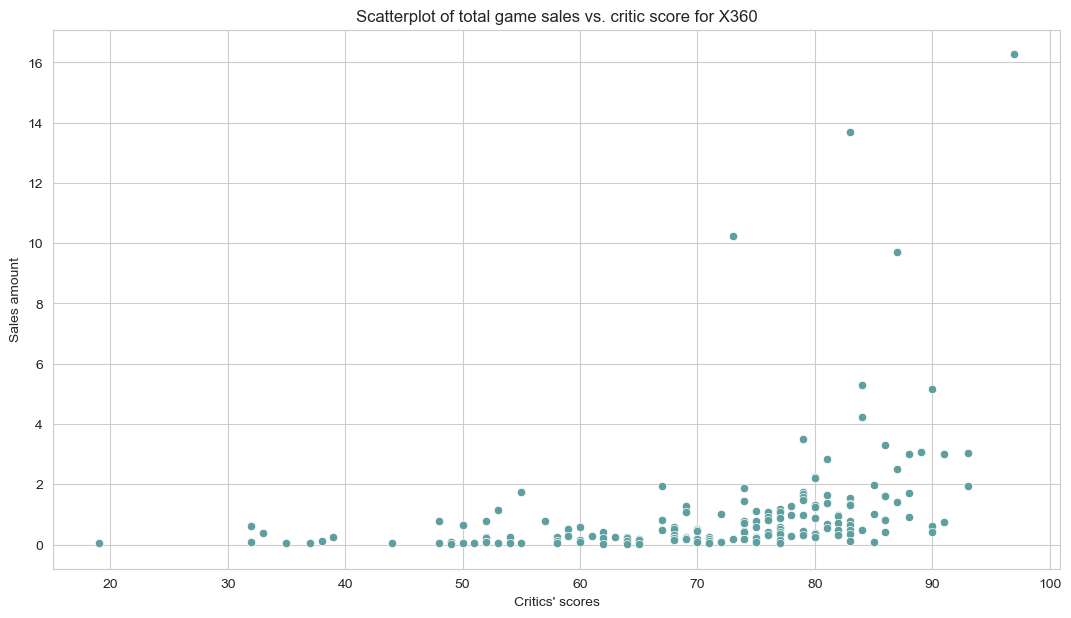

In [49]:
plt.figure(figsize=(13,7))
sea.scatterplot(x="critic_score", y="total_sales", data=data_X360)

plt.xlabel("Critics' scores")
plt.ylabel("Sales amount")
plt.grid(True)
plt.title("Scatterplot of total game sales vs. critic score for X360");

In [50]:
print(
    "Correlation coefficient of users' scores and sales:", round(
    data_X360["user_score"].corr(data_X360["total_sales"]),2))

Correlation coefficient of users' scores and sales: 0.01


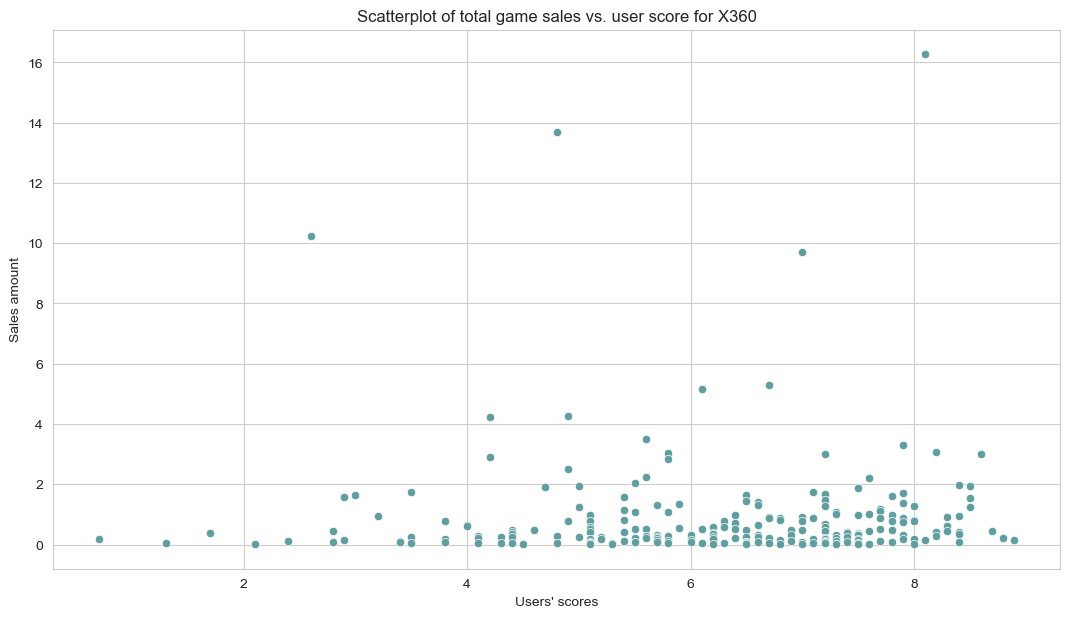

In [51]:
plt.figure(figsize=(13,7))
sea.scatterplot(x="user_score", y="total_sales", data=data_X360)
plt.grid(True)
plt.xlabel("Users' scores")
plt.ylabel("Sales amount")
plt.title("Scatterplot of total game sales vs. user score for X360");

In [52]:
data_X360_matrix =data_X360[["total_sales", "critic_score", "user_score"]]
data_X360_matrix.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.360573,0.006164
critic_score,0.360573,1.000000,0.557352
user_score,0.006164,0.557352,1.000000


The weakest correlation between sales and critics' scores is most visible (coefficient 0,39). 

But the opinion of the users themselves is not even that important (coeff. 0,11). 

The correlation between critics' and users' scores is high, but it is not worth valuing (critics review games that are popular with users, and users play games that are highly rated by critics). 

Now let's take our results to sales from other platforms. 

In [53]:
data_PS3 = data_filtred[(data_filtred["platform"] == "PS3")]
data_PS3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,period
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05,2010 - 2016
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79,2010 - 2016
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36,2010 - 2016
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17,2010 - 2016
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46,2010 - 2016


In [54]:
data_PS3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 493 entries, 16 to 16710
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             493 non-null    object 
 1   platform         493 non-null    object 
 2   year_of_release  493 non-null    int64  
 3   genre            493 non-null    object 
 4   na_sales         493 non-null    float64
 5   eu_sales         493 non-null    float64
 6   jp_sales         493 non-null    float64
 7   other_sales      493 non-null    float64
 8   critic_score     214 non-null    float64
 9   user_score       283 non-null    float64
 10  rating           493 non-null    object 
 11  total_sales      493 non-null    float64
 12  period           493 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 53.9+ KB


In [55]:
print(
    "Correlation coefficient of critics' scores and sales:", round(
        data_PS3["critic_score"].corr(data_PS3["total_sales"]),2))

Correlation coefficient of critics' scores and sales: 0.33


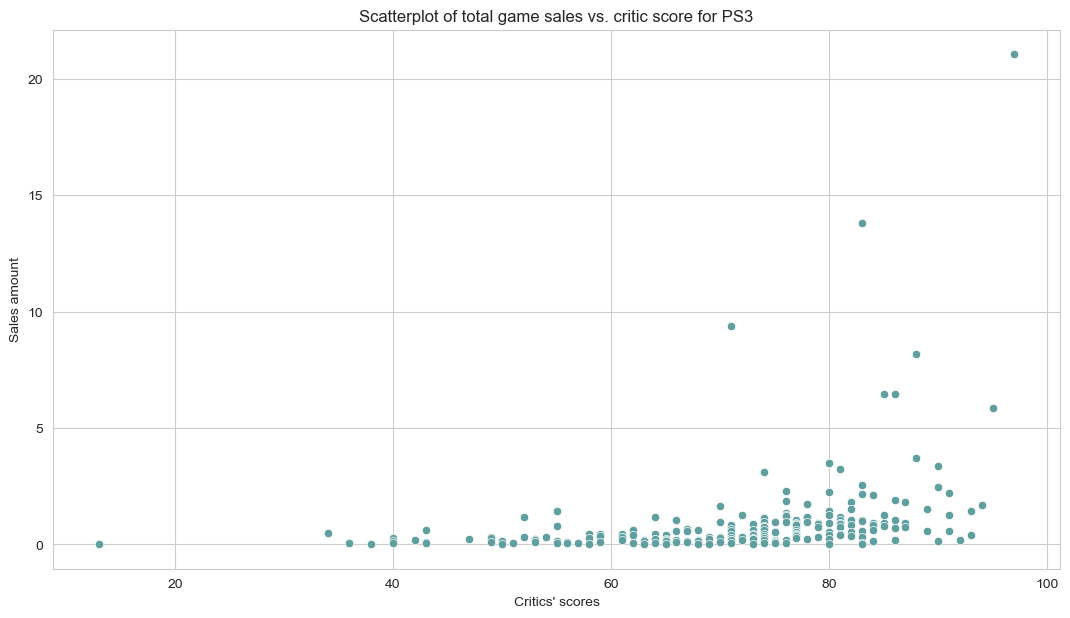

In [56]:
plt.figure(figsize=(13,7))
sea.scatterplot(x="critic_score", y="total_sales", data=data_PS3)
plt.xlabel("Critics' scores")
plt.ylabel("Sales amount")
plt.grid(True)
plt.title("Scatterplot of total game sales vs. critic score for PS3");

In [57]:
print(
    "Correlation coefficient of users' scores and sales:", round(
        data_PS3["user_score"].corr(data_PS3["total_sales"]),2))

Correlation coefficient of users' scores and sales: -0.01


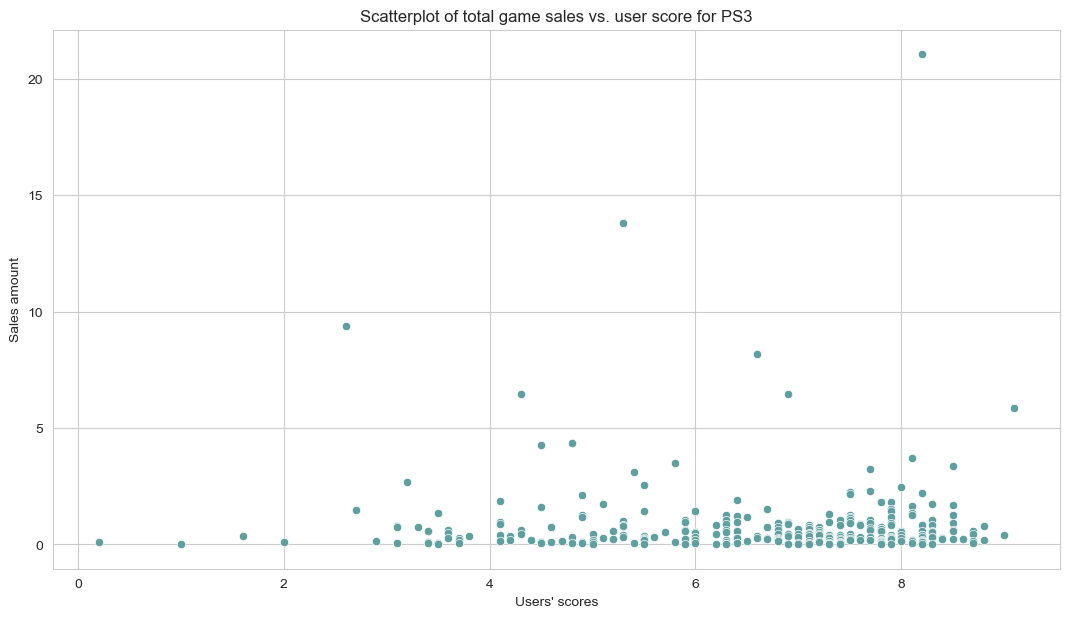

In [58]:
plt.figure(figsize=(13,7))
sea.scatterplot(x="user_score", y="total_sales", data=data_PS3)
plt.grid(True)
plt.xlabel("Users' scores")
plt.ylabel("Sales amount")
plt.title("Scatterplot of total game sales vs. user score for PS3");

In [59]:
data_PS3_matrix =data_PS3[["total_sales", "critic_score", "user_score"]]
data_PS3_matrix.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.331497,-0.005144
critic_score,0.331497,1.000000,0.539456
user_score,-0.005144,0.539456,1.000000


In [60]:
data_WiiU = data_filtred[(data_filtred["platform"] == "WiiU")]
data_WiiU.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,period
110,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09,2010 - 2016
185,New Super Mario Bros. U,WiiU,2012,Platform,2.30,1.34,1.27,0.32,84.0,8.1,E,5.23,2010 - 2016
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,No ESRB,4.87,2010 - 2016
247,Splatoon,WiiU,2015,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44,2010 - 2016
248,Nintendo Land,WiiU,2012,Misc,2.52,1.11,0.46,0.33,77.0,7.9,E10+,4.42,2010 - 2016


In [61]:
data_WiiU.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 110 to 16652
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             147 non-null    object 
 1   platform         147 non-null    object 
 2   year_of_release  147 non-null    int64  
 3   genre            147 non-null    object 
 4   na_sales         147 non-null    float64
 5   eu_sales         147 non-null    float64
 6   jp_sales         147 non-null    float64
 7   other_sales      147 non-null    float64
 8   critic_score     90 non-null     float64
 9   user_score       100 non-null    float64
 10  rating           147 non-null    object 
 11  total_sales      147 non-null    float64
 12  period           147 non-null    object 
dtypes: float64(7), int64(1), object(5)
memory usage: 16.1+ KB


In [62]:
print(
    "Correlation coefficient of critics' scores and sales:", round(
        data_WiiU["critic_score"].corr(data_WiiU["total_sales"]),2))

Correlation coefficient of critics' scores and sales: 0.35


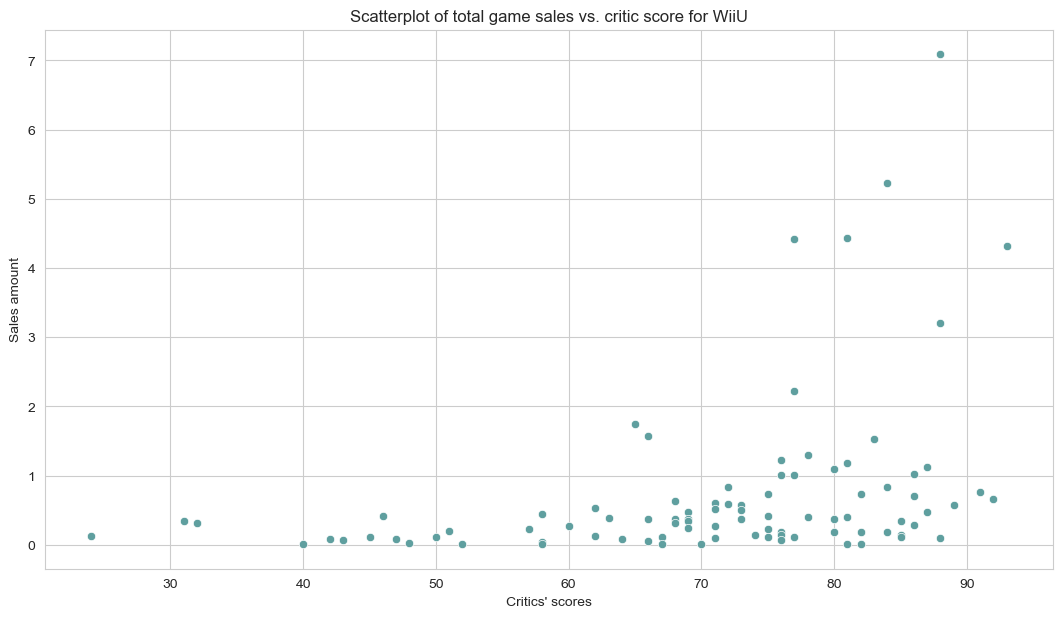

In [63]:
plt.figure(figsize=(13,7))
sea.scatterplot(x="critic_score", y="total_sales", data=data_WiiU)
plt.grid(True)
plt.xlabel("Critics' scores")
plt.ylabel("Sales amount")
plt.title("Scatterplot of total game sales vs. critic score for WiiU"); 

In [64]:
print(
    "Correlation coefficient of users' scores and sales:", round(
        data_WiiU["user_score"].corr(data_WiiU["total_sales"]),2))

Correlation coefficient of users' scores and sales: 0.4


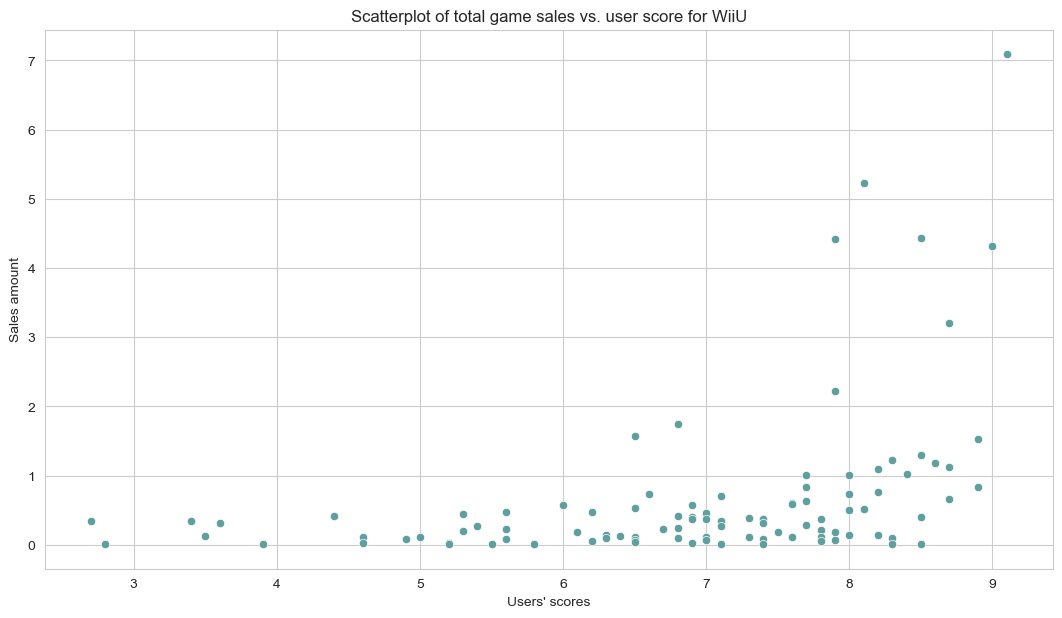

In [65]:
plt.figure(figsize=(13,7))
sea.scatterplot(x="user_score", y="total_sales", data=data_WiiU)
plt.grid(True)
plt.xlabel("Users' scores")
plt.ylabel("Sales amount")
plt.title("Scatterplot of total game sales vs. user score for WiiU");

In [66]:
data_WiiU_matrix =data_WiiU[["total_sales", "critic_score", "user_score"]]
data_WiiU_matrix.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.34838,0.400219
critic_score,0.348380,1.00000,0.770080
user_score,0.400219,0.77008,1.000000


The scatter plot and correlation coefficient confirmed that for the Play Station 3, and for the WiiU (for the Japanese platform only the user score es even slightly more influential on sales). 

## 2.8. Genres<a class="anchor" id="second8"></a>


Now let's check the genres we have, their amount and distribution. 

In [67]:
data_filtred['genre'].value_counts()

Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: genre, dtype: int64

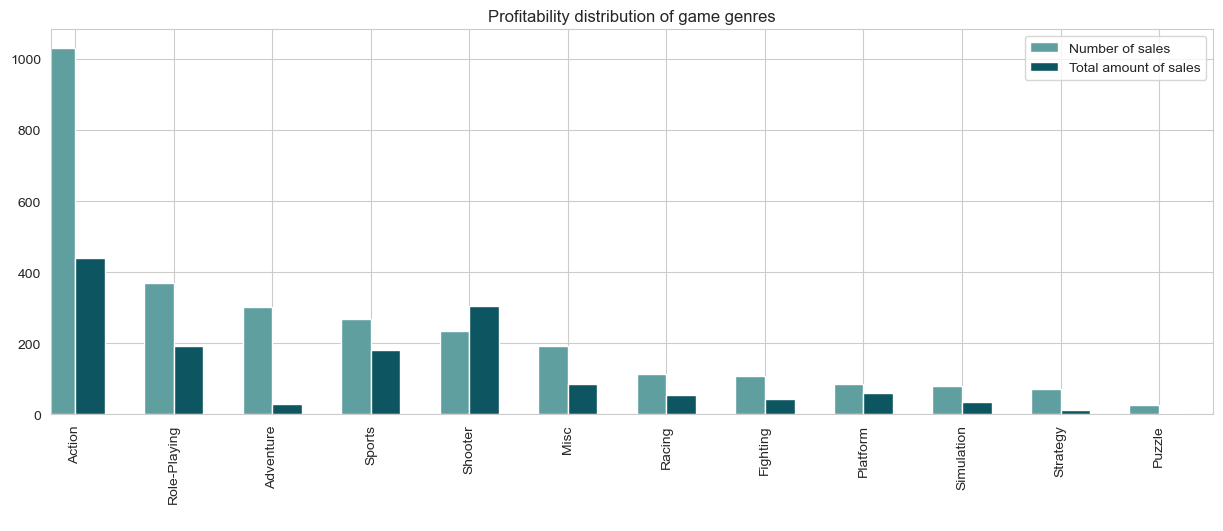

In [68]:
genre_pivot = data_filtred.groupby(
    "genre").agg({"name": "count", "total_sales": "sum"}).sort_values(by="name", ascending=False)

plot1 = genre_pivot["name"]
plot1.plot(kind="bar", figsize=(13,7), color="#5F9F9F", position=1, width=0.3)
plt.title("Profitability distribution of game genres")
plot2 = genre_pivot["total_sales"]
plot2.plot(kind="bar", figsize=(15,5), color="#0D5661", position=0, width=0.3)
plt.grid(True)
plt.xlabel(" ")
plt.legend(["Number of sales", "Total amount of sales"]);

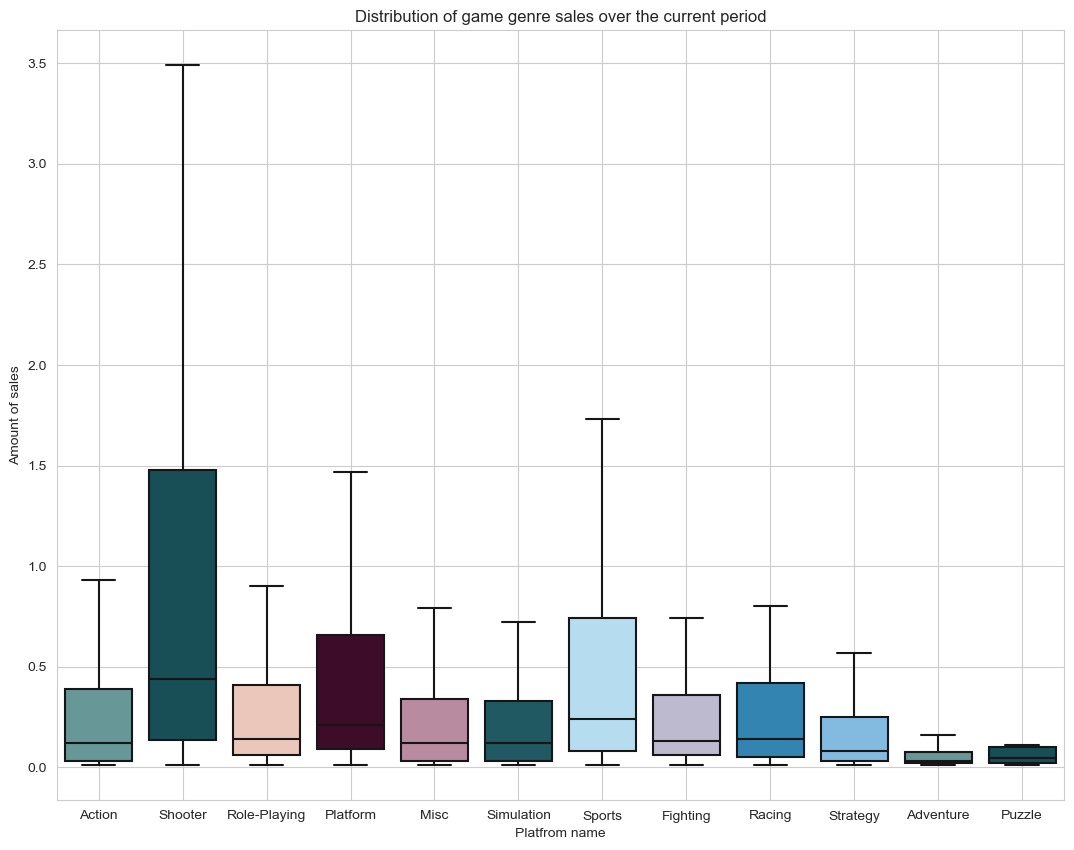

In [69]:
plt.figure(figsize=(13,10))
sea.boxplot(data=data_filtred, x="genre", y="total_sales", sym='', palette=palette)
plt.title("Distribution of game genre sales over the current period")
plt.xlabel("Platfrom name")
plt.ylabel("Amount of sales")
plt.grid(True)
plt.show()

And here we can already see the difference in sales medians by genre: 

1. Shooters
2. Sports
3. Platfrom
4. And Action, which has always been at the top of our list - median sales are the same as Fighting and Racing.

The most profitable games are of the Shooter genre. It is followed by Sport simulator by a good margin, and Platform, and only then by Action, which was the highest in the distribution graph. 

And the Puzzles sell the worst. 

Also in the anti-rating of the amount of sales is the Adventure ganre, although it is in the top-5 in terms of number sold games. 

## 2.9. EDA conclusions<a class="anchor" id="second9"></a>

We looked at how games were released over the years, saw the ups and downs of different gaming platforms. 

The number of games produced grew very smoothly from 1980 to 1990, remaining at the same low level (games on consoles were not so popular, total sales were about 50 million copies sold), and since 1996 there was a rise, peaking in 2008-2009 (about 200 millions copies sold) and further decrease. 

The life cycle of gaming platforms is approximately 10 years. 
Their peak occurs at about 3-5 years after release. 
But all games on platforms shows a decline by our time. 


Top-5 gaming platforms of all time: 
* 1 - PS2 
* 2 - DS 
* 3 - PS3 
* 4 - Wii 
* 5 - X360 

And further in the work, we decided to consider the period from 2012. 

The most potentially profitable gaming platforms: 
* PS4 
* XOne 
* 3DS 

People belive the critics and their ratings, but the players themselves don't (but that doesn't work for Japanese consoles). 

The most popular genres: 
* Action
* Sports
* Misc

The most profitable genres: 
* Shooter
* Sports
* Platform
* Action

## 3. User portrait of each region<a class="anchor" id="third"></a>

There are 4 different regions in our dataframe: 
 * NA - North America
 * EU - Europe
 * JP - Japan
 * Other - The rest of the world


Let's make portraits of users of three of them - NA, EU and JP. 

We will take a look at their most popular platfroms, genres and how each is affected by the ESRB rating. 

## 3.1. Platforms in different regions<a class="anchor" id="third1"></a>

In [70]:
region_diff_platform = data_filtred.pivot_table(
    index = "platform", values = ["na_sales", "eu_sales", "jp_sales"], aggfunc = ["sum"])

In [71]:
region_diff_platform

sum                  
         eu_sales jp_sales na_sales
platform                           
3DS         42.64    87.79    55.31
DS           3.53     3.72     4.59
PC          37.76     0.00    19.12
PS3        106.86    35.29   103.38
PS4        141.09    15.96   108.74
PSP          0.42    10.47     0.13
PSV         11.36    21.04    10.98
Wii         11.92     3.39    17.45
WiiU        25.13    13.01    38.10
X360        74.52     1.57   140.05
XOne        51.59     0.34    93.12

In [72]:
region_diff_platform.columns = ["eu_sales", "jp_sales", "na_sales"]

In [73]:
top_5_na = region_diff_platform.sort_values(by= "na_sales", ascending = False).head(5)
top_5_eu = region_diff_platform.sort_values(by= "eu_sales", ascending = False).head(5)
top_5_jp = region_diff_platform.sort_values(by= "jp_sales", ascending = False).head(5)

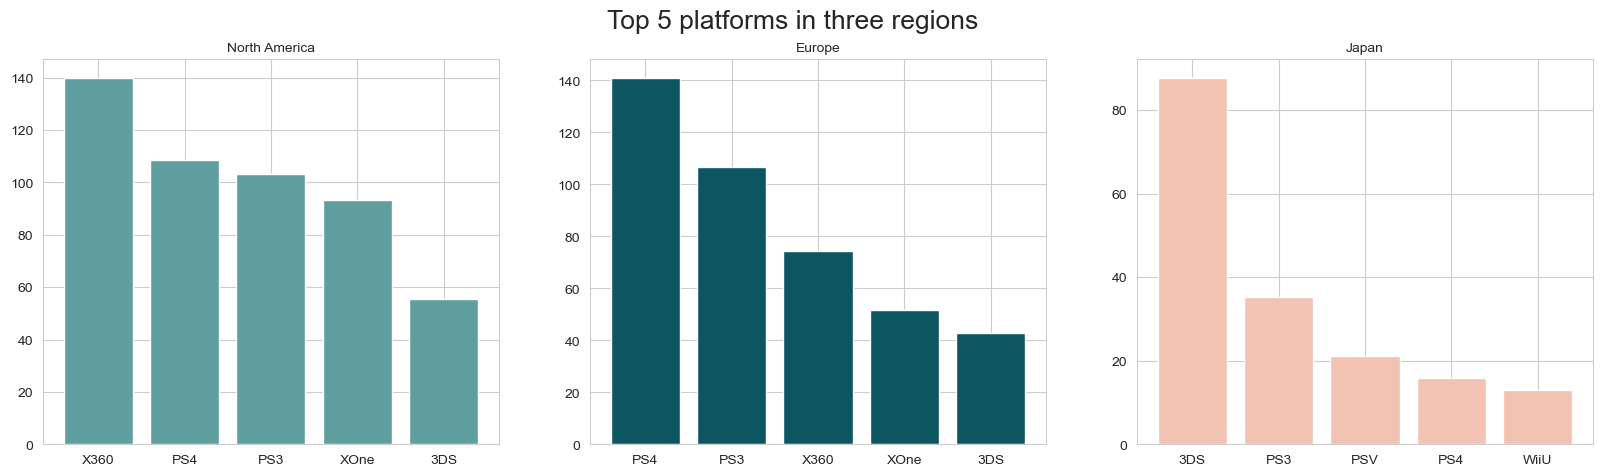

In [74]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.bar(top_5_na.index, top_5_na["na_sales"], color='#5F9F9F')
ax1.set_title("North America", fontsize=10)

ax2.bar(top_5_eu.index, top_5_eu["eu_sales"], color="#0D5661")
ax2.set_title("Europe", fontsize=10)

ax3.bar(top_5_jp.index, top_5_jp["jp_sales"], color="#F2C3B2")
ax3.set_title("Japan", fontsize=10)

fig.suptitle("Top 5 platforms in three regions", fontsize=19)

plt.show()

So we can quickly name the favorites in each region's market: 

For Europe: 
* 1. By a good margin, the PS4 comes first. 
* 2. PS3.
* 3-4 X360 and XOne. 
* 5. Closes 3DS. 

For North America:
* 1. X360 (And it's not even in the top-5 in Japan).
* 2-3. PS4 and PS3.
* 4. XOne.
* 5. Also closes 3DS. 

For Japan: 
* 1. 3DS - what has been in last place in other regions is in the first place here. 
* 2-4. PS3, PSV, PS4
* 5. WiiU.

Now let's look at the same data, but on a detailed common graph. 

In [75]:
top_5_na

,eu_sales,jp_sales,na_sales
platform,,,
X360,74.52,1.57,140.05
PS4,141.09,15.96,108.74
PS3,106.86,35.29,103.38
XOne,51.59,0.34,93.12
3DS,42.64,87.79,55.31


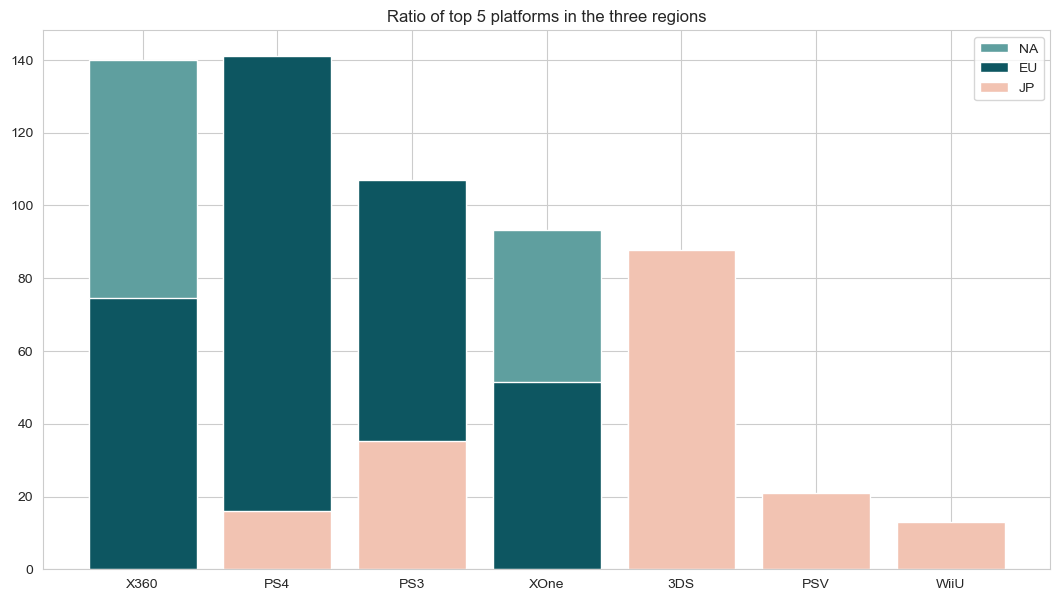

In [76]:
plt.figure(figsize=(13, 7))
plt.bar(top_5_na.index, top_5_na["na_sales"], color="#5F9F9F")
plt.bar(top_5_eu.index, top_5_eu["eu_sales"], color="#0D5661")
plt.bar(top_5_jp.index, top_5_jp["jp_sales"], color="#F2C3B2")

plt.title("Ratio of top 5 platforms in the three regions")
plt.legend(["NA", "EU", "JP"])
plt.show()

In [77]:
top_na_pie = region_diff_platform.sort_values(by= "na_sales", ascending = False)
top_eu_pie = region_diff_platform.sort_values(by= "eu_sales", ascending = False)
top_jp_pie = region_diff_platform.sort_values(by= "jp_sales", ascending = False)

In [78]:
other_na = region_diff_platform.sort_values(by= "na_sales", ascending = False)[5:11].sum(axis= 0)
other_eu = region_diff_platform.sort_values(by= "eu_sales", ascending = False)[5:11].sum(axis= 0)
other_jp = region_diff_platform.sort_values(by= "jp_sales", ascending = False)[5:11].sum(axis= 0)

In [79]:
other_na.name = 'other'    
other_eu.name = 'other'    
other_jp.name = 'other'    

In [80]:
top_na_pie = top_na_pie.append(other_na.transpose()).sort_values(by= "na_sales", ascending = False).head(6)
top_eu_pie = top_eu_pie.append(other_eu.transpose()).sort_values(by= "eu_sales", ascending = False).head(6)
top_jp_pie = top_jp_pie.append(other_jp.transpose()).sort_values(by= "jp_sales", ascending = False).head(6)

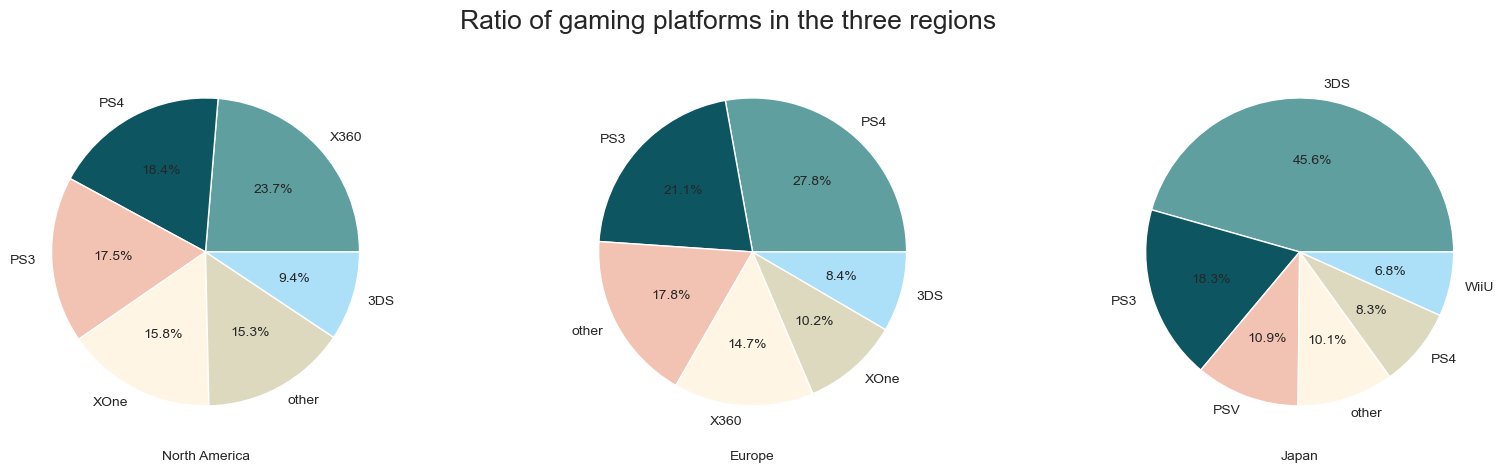

In [81]:
palette = ['#5F9F9F', '#0D5661', '#F2C3B2', '#FEF5E4', '#DCD9BF', 
           '#ACE0F9', '#BBB5D3', '#1F8AC7', '#C8D5EB', '#74BDEF', '#5F9F9F']
sea.set_palette(palette=palette)
sea.set_style("whitegrid")

fig, ax = plt.subplots(1, 3, figsize=(20,5))
top_na_pie.plot.pie(y="na_sales", ax=ax[0], autopct="%1.1f%%")
top_eu_pie.plot.pie(y="eu_sales", ax=ax[1], autopct="%1.1f%%")
top_jp_pie.plot.pie(y="jp_sales", ax=ax[2], autopct="%1.1f%%")

ax[0].set(xlabel="North America")
ax[0].set(ylabel="")
ax[0].get_legend().remove()
ax[1].set(xlabel="Europe")
ax[1].set(ylabel="")
ax[1].get_legend().remove()
ax[2].set(xlabel="Japan")
ax[2].set(ylabel="")
ax[2].get_legend().remove()

fig.suptitle("Ratio of gaming platforms in the three regions", fontsize=19)

plt.show()

It also shows a difference in platform preferences in different regions, where overlaps and where it does not. 

Japan is different from the other two regions. 

Share the international market with the X360 and PS4, and America still likes to play more in general. 

We also checked the share of gaming platforms that not in our top-5 and see that they occupy a very small percentage (15,3% in NA, 10,2% in EU and 10% in Japan). 

## 3.2. Genres in different regions<a class="anchor" id="third2"></a>

In [82]:
region_diff_genre = data_filtred.pivot_table(
    index = "genre", values = ["na_sales", "eu_sales", "jp_sales"], aggfunc = ["sum"])

In [83]:
region_diff_genre

sum                  
             eu_sales jp_sales na_sales
genre                                  
Action         159.34    52.80   177.84
Adventure        9.46     8.24     8.92
Fighting        10.79     9.44    19.79
Misc            26.32    12.86    38.19
Platform        21.41     8.63    25.38
Puzzle           1.40     2.14     1.13
Racing          27.29     2.50    17.22
Role-Playing    48.53    65.44    64.00
Shooter        113.47     9.23   144.77
Simulation      14.55    10.41     7.97
Sports          69.09     8.01    81.53
Strategy         5.17     2.88     4.23

In [84]:
region_diff_genre.columns = ["eu_sales", "jp_sales", "na_sales"]

In [85]:
top_5_na1 = region_diff_genre.sort_values(by= "na_sales", ascending = False).head(5)
top_5_eu1 = region_diff_genre.sort_values(by= "eu_sales", ascending = False).head(5)
top_5_jp1 = region_diff_genre.sort_values(by= "jp_sales", ascending = False).head(5)

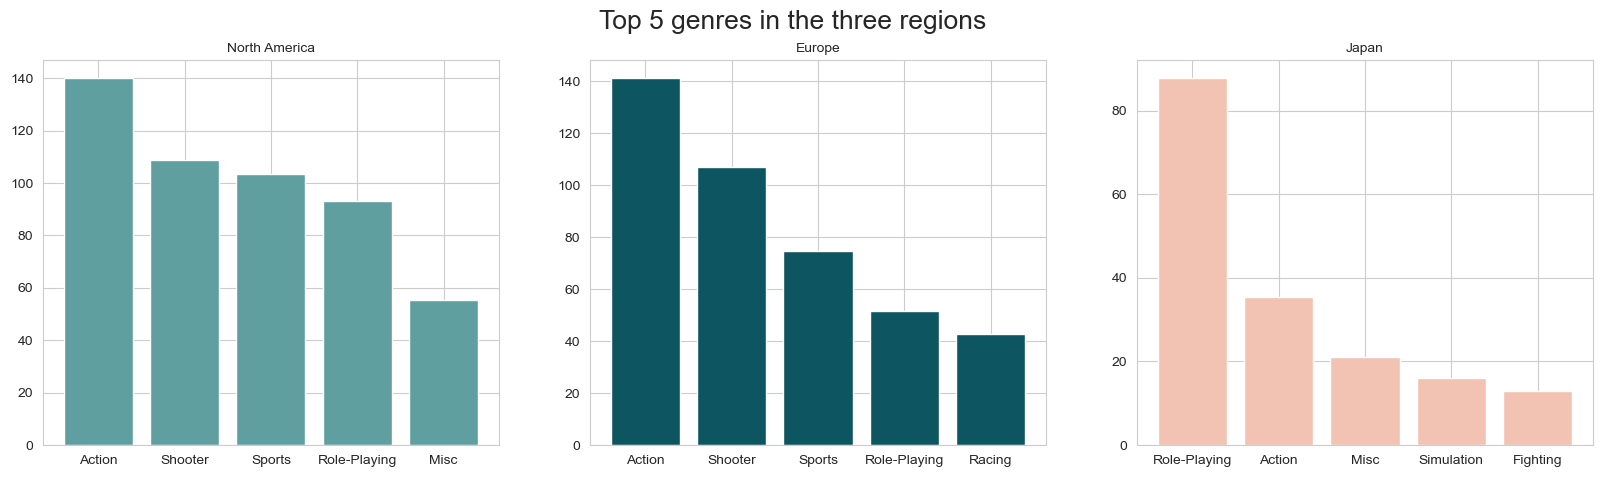

In [86]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.bar(top_5_na1.index, top_5_na["na_sales"], color="#5F9F9F")
ax1.set_title("North America", fontsize=10)

ax2.bar(top_5_eu1.index, top_5_eu["eu_sales"], color="#0D5661")
ax2.set_title("Europe", fontsize=10)

ax3.bar(top_5_jp1.index, top_5_jp["jp_sales"], color="#F2C3B2")
ax3.set_title("Japan", fontsize=10)

fig.suptitle("Top 5 genres in the three regions", fontsize=19)

plt.show()

As with platforms - America and Europe are almost identical in their preferences, differing only in the 5th preferred genre: in America it's and RPG and in Europe it's racing. 


And in Japan, as always, thing are very different: 
1. RPG 
2. Action
3. Misc
4. Simulation
5. Fighting.

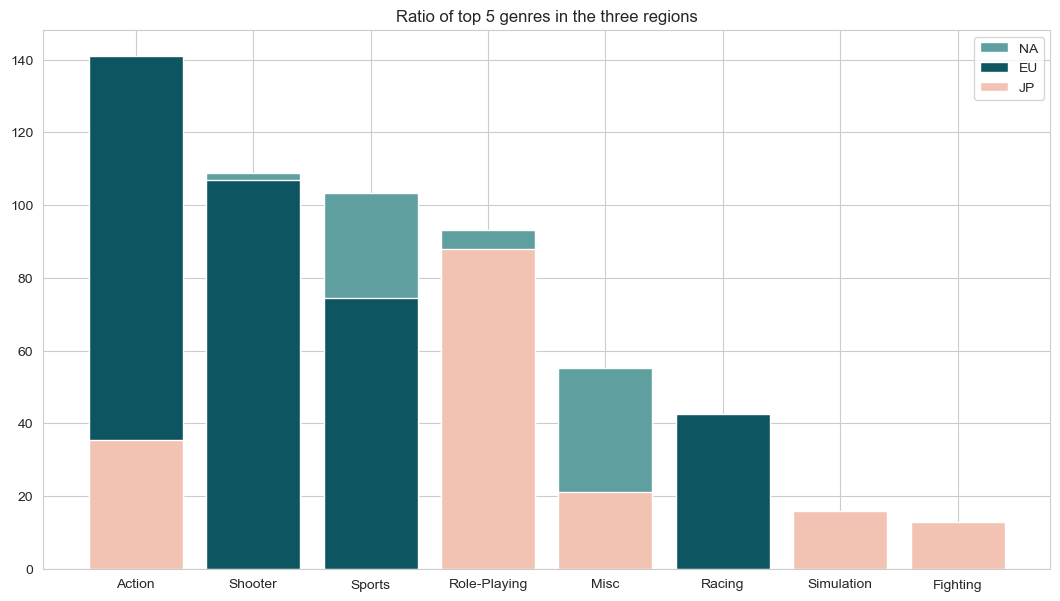

In [87]:
plt.figure(figsize=(13, 7))

plt.bar(top_5_na1.index, top_5_na["na_sales"], color="#5F9F9F")
plt.bar(top_5_eu1.index, top_5_eu["eu_sales"], color="#0D5661")
plt.bar(top_5_jp1.index, top_5_jp["jp_sales"], color="#F2C3B2")

plt.title("Ratio of top 5 genres in the three regions")
plt.legend(["NA", "EU", "JP"]);

In [88]:
top_na_pie = region_diff_genre.sort_values(by= "na_sales", ascending = False)
top_eu_pie = region_diff_genre.sort_values(by= "eu_sales", ascending = False)
top_jp_pie = region_diff_genre.sort_values(by= "jp_sales", ascending = False)

In [89]:
other_na = region_diff_genre.sort_values(by= "na_sales", ascending = False)[5:11].sum(axis= 0)
other_eu = region_diff_genre.sort_values(by= "eu_sales", ascending = False)[5:11].sum(axis= 0)
other_jp = region_diff_genre.sort_values(by= "jp_sales", ascending = False)[5:11].sum(axis= 0)

In [90]:
other_na.name = 'other'    
other_eu.name = 'other'    
other_jp.name = 'other'    

In [91]:
top_na_pie = top_na_pie.append(other_na.transpose()).sort_values(by= "na_sales", ascending = False).head(6)
top_eu_pie = top_eu_pie.append(other_eu.transpose()).sort_values(by= "eu_sales", ascending = False).head(6)
top_jp_pie = top_jp_pie.append(other_jp.transpose()).sort_values(by= "jp_sales", ascending = False).head(6)

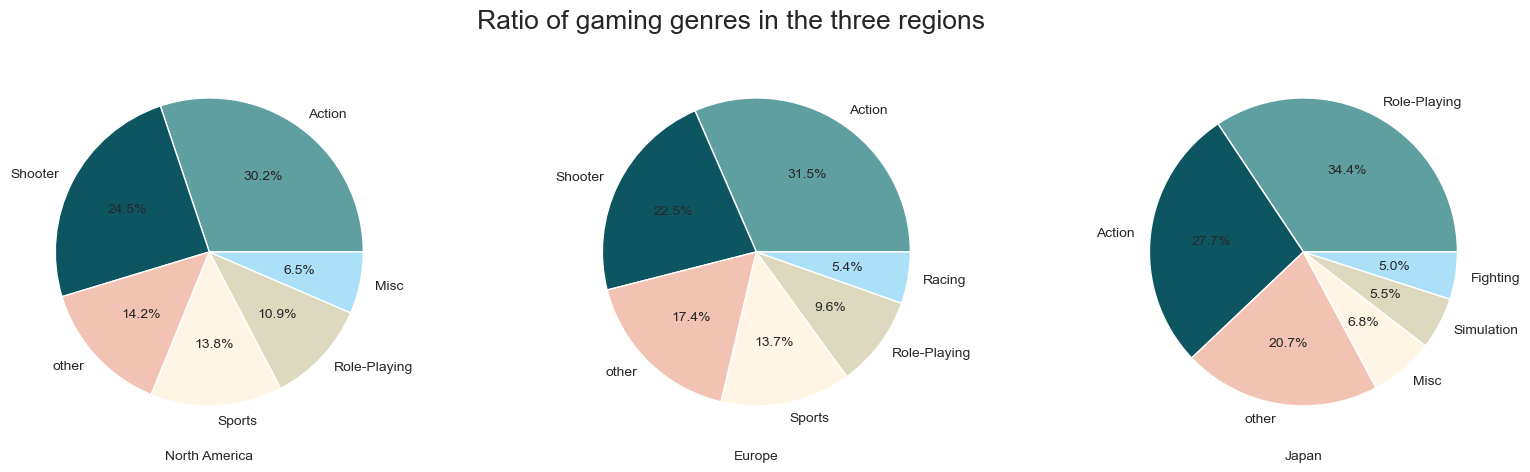

In [92]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
top_na_pie.plot.pie(y="na_sales", ax=ax[0], autopct="%1.1f%%")
top_eu_pie.plot.pie(y="eu_sales", ax=ax[1], autopct="%1.1f%%")
top_jp_pie.plot.pie(y="jp_sales", ax=ax[2], autopct="%1.1f%%")

ax[0].set(xlabel="North America")
ax[0].set(ylabel="")
ax[0].get_legend().remove()
ax[1].set(xlabel="Europe")
ax[1].set(ylabel="")
ax[1].get_legend().remove()
ax[2].set(xlabel="Japan")
ax[2].set(ylabel="")
ax[2].get_legend().remove()

fig.suptitle("Ratio of gaming genres in the three regions", fontsize=19)

plt.show()

We also included all the genres of games that were not included in our top 5 and that's about 15-20% of the market. 

The rest of the world plays the same games as America (according to the Action genre, it generally makes almost half of the market). 

Only that Europe plays Shooters even more than America. And Japan enjoys Misc. 

## 3.3. Impact of ESRB rating in regional sales<a class="anchor" id="third3"></a>

ESRB (Entertainment Software Rating Board) — is an association that determines the age rating of video games. The ESRB evaluates game content and assigns it in appropriate age category: 
* AO - `Adults Only 18+`
* E - `Everyone`, from 6 years old
* E10+ - `Everyone 10+` -  for ages 10 and over. 
* EC - `Early Childhood`, from 3 years old
* M - `Mature 17+`, for ages 17 and over
* RP - `Rating Pending` - for games which have not yet been assigned a final rating
* T - `Teen`, for ages 13 and over.

In [93]:
region_ESRB = data_filtred.pivot_table(
    index = "rating", values = ["na_sales", "eu_sales", "jp_sales"], aggfunc = ["sum"])
region_ESRB

sum                  
        eu_sales jp_sales na_sales
rating                            
E         113.03    28.33   114.37
E10+       55.37     8.19    75.70
M         193.96    21.20   231.57
No ESRB    91.50   108.84   103.31
T          52.96    26.02    66.02

In [94]:
region_ESRB.columns = ["eu_sales", "jp_sales", "na_sales"]

In [95]:
top_5_na2 = region_ESRB.sort_values(by= "na_sales", ascending = False).head(5)
top_5_eu2 = region_ESRB.sort_values(by= "eu_sales", ascending = False).head(5)
top_5_jp2 = region_ESRB.sort_values(by= "jp_sales", ascending = False).head(5)

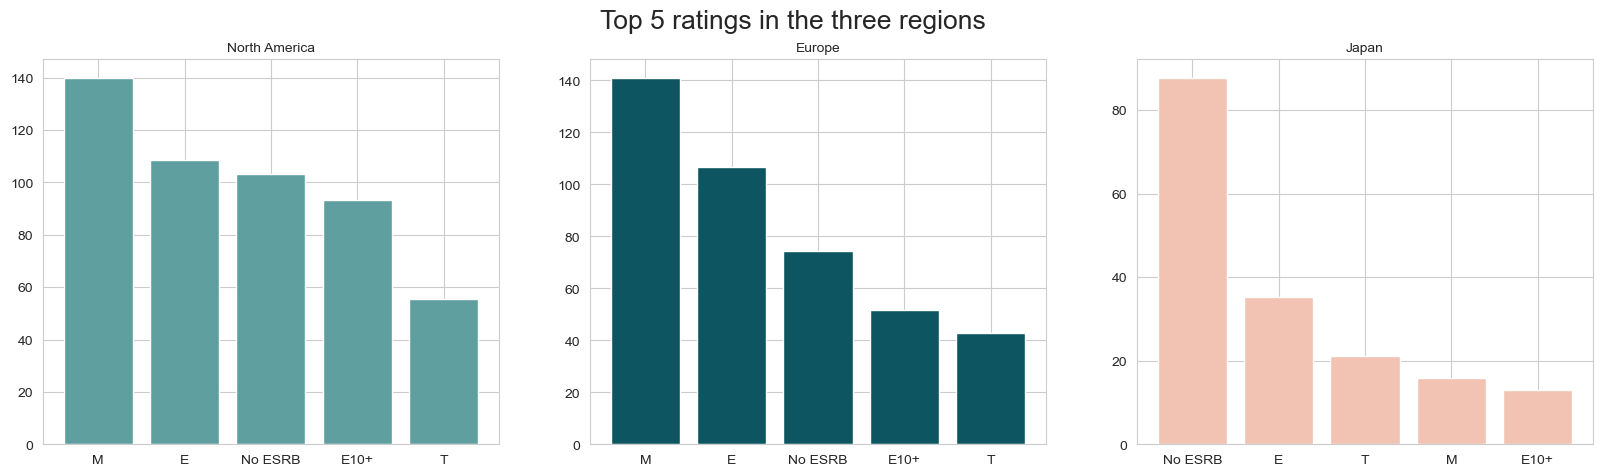

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))

ax1.bar(top_5_na2.index, top_5_na["na_sales"], color="#5F9F9F")
ax1.set_title("North America", fontsize=10)

ax2.bar(top_5_eu2.index, top_5_eu["eu_sales"], color="#0D5661")
ax2.set_title("Europe", fontsize=10)

ax3.bar(top_5_jp2.index, top_5_jp["jp_sales"], color="#F2C3B2")
ax3.set_title("Japan", fontsize=10)

fig.suptitle("Top 5 ratings in the three regions", fontsize=19)

plt.show()

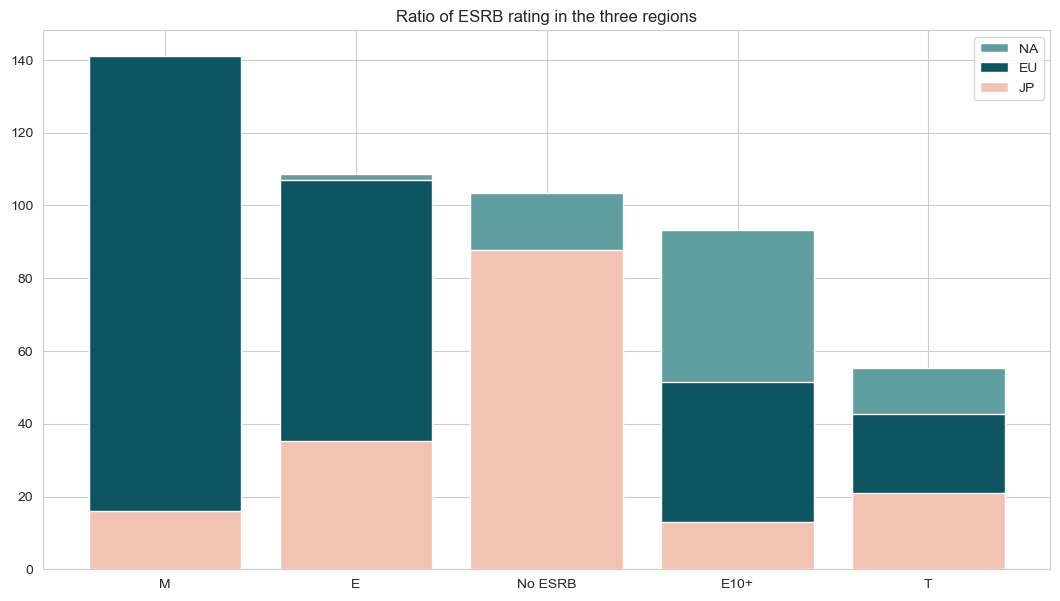

In [97]:
#fig, ax = plt.subplots()
plt.figure(figsize=(13, 7))


plt.bar(top_5_na2.index, top_5_na["na_sales"], color="#5F9F9F")
plt.bar(top_5_eu2.index, top_5_eu["eu_sales"], color="#0D5661")
plt.bar(top_5_jp2.index, top_5_jp["jp_sales"], color="#F2C3B2")

plt.title("Ratio of ESRB rating in the three regions")

plt.legend(["NA", "EU", "JP"])
plt.show()

The ESRB ranking games in America and Europe are the same, with `Mature` in the first place, `Everyone` in the second and unranked `No ESRB` in third. 

And in Japan unranked games `No ESRB` lead the way, and then there's `Everyone`, `Teen` and `Mature`. 


And according to the total of all three regions, the leading category is for adults - `Mature` (Europe + Japan, without America), `Everyone` - again, Europe and Japan, and a very small contribution from America. And Japan is a major player in `non-ESRB-rated` games. 

## 3.4. Conclusions on user portraits  of the 3 regions<a class="anchor" id="third4"></a>

<b> Gaming platforms </b>

In America and Europe, everyone plays the same consoles, but Japan is different from the other two regions. Share the international market with the PS4, PS3 and X360

 
<b> Game genres </b> 

The rest of the world plays the same games as America (according to the Action genre, it generally makes almost half of the market). Only that Europe plays Shooters even more than America.

As with platforms, America and Europe are almost the same in their tastes, differing only in the 5th of their favorite genres: in America it's RPG, and in Europe it's Racing. 

And Japan again differs from everyone else, choosing the first of all the RPG games, and lastly - Misc. 
 
<b> Impact of ESRB rating  </b>  

The ESRB ranking games in America and Europe are the same, with `Mature` in the first place, `Everyone` in the second and unranked `No ESRB` in third. 

And in Japan unranked games `No ESRB` lead the way, and then there's `Everyone`, `Teen` and `Mature`. 

And according to the total of all three regions, the leading category is for adults - `Mature` (Europe + Japan, without America), `Everyone` - again, Europe and Japan, and a very small contribution from America. And Japan is a major player in `non-ESRB-rated` games. 

## 4. Hypothesis testing<a class="anchor" id="fourth"></a>

Let's test the hypothesis: 
- the average user ratings of the XOne and PC platforms are the same
- the average user ratings for Action and Sports are different
 
The critical level of statistical significance (alpha) is set to 0,05, and if the p-value is less, than it, we reject the hypothesis. 

## 4.1. The average user ratings of the XOne and PC platforms are the same<a class="anchor" id=«fourth1»></a>

Let's formulate a two-sided hypothesis: 
- H₀ - Xbox One average user ratings = PC average user ratings
- H₁ - Xbox One average user ratings ≠ PC average user ratings

In [98]:
XOne = data_filtred.query('platform == "XOne"')["user_score"]
XOne.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [99]:
PC = data_filtred.query('platform == "PC"')["user_score"]
PC.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

In [100]:
print("Average user rating of the XOne platform", round(XOne.mean(), 2))

print("Average user rating of the PC platform", round(PC.mean(), 2))

Average user rating of the XOne platform 6.52
Average user rating of the PC platform 6.43


In [101]:
alpha = 0.05 

results = st.ttest_ind(XOne.dropna(), PC.dropna(), equal_var= False)

print("p-value = ", results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: the difference is statistically significant')
else:
    print(
        'We failed to reject the null hypothesis, no difference can be drawn'
    ) 

p-value =  0.5489537965134912
We failed to reject the null hypothesis, no difference can be drawn


The average user rating of the Xone platform does not differ from the average user rating of the PC platform. We cannot reject the null hypothesis. 

Let us also explain that using `describe()` method, we noticed that our samples are of different sizes, so the `equal_var= False` parameter was applied, which indicates that the samples are unequal.

## 4.2. The average user for the Action and Sports genres are the same<a class="anchor" id=«fourth2»></a>

Let's formulate a two-sided hypothesis: 
- H₀ - average user ratings for Action genre = average user ratings for Sports genre
- H₁ - average user ratings for Action genre ≠ average user ratings for Sports genre


In [102]:
Action = data_filtred.query('genre == "Action"')["user_score"]
Action.describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [103]:
Sports = data_filtred.query('genre == "Sports"')["user_score"]
Sports.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

In [104]:
print("Average user rating of the Action genre", round(Action.mean(), 2))

print("Average user rating of the Sports genre", round(Sports.mean(), 2))

Average user rating of the Action genre 6.83
Average user rating of the Sports genre 5.46


In [105]:
alpha = 0.05 

results = st.ttest_ind(Action.dropna(), Sports.dropna(), equal_var = False)

print("p-value = ", results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis: the difference is statistically significant')
else:
    print(
        'We failed to reject the null hypothesis, no difference can be drawn'
    ) 

p-value =  4.24307776572644e-20
We reject the null hypothesis: the difference is statistically significant


The average user rating of the Action genre does differ from the average user rating of the Sports rating. 
The null hypothesis was not confirmed. 

Let us also explain that using `describe()` method, we noticed that our samples are of different sizes, so the `equal_var= False` parameter was applied, which indicates that the samples are unequal.

## 4.3. Hypotheses conclusions<a class="anchor" id=«fourth3»></a>

We tested, by applying hypotheses, whether the average user ratings are equal to each other: 
* Platforms XOne and PC
* Genres Actions and Sports 

The critical level of statistical significance (alpha) is set to 0,05, and if the p-value is less, than it, we reject the hypothesis

We noticed that our samples are of different sizes, so the equal_var= False parameter was applied, which indicates that the samples are unequal. 

**The average user rating of the Xone platform does not differ from the average user rating of the PC platform. We cannot reject the null hypothesis.**

**The average user rating of the Action genre does differ from the average user rating of the Sports rating. The null hypothesis was not confirmed.**

## 5. General conclusions and recommendations<a class="anchor" id=«fifth»></a>

**Preprocessing part** 

We got a dataframe with 36 years of game sales data for analysis, including sales across North America, Europe, Japan adn the rest of the world (in million of copies sold), critics' and users' ratings. 

Our task is to identify the patterns that determine the success of the game for the advertising campaign for 2017. 

A huge number of missing values, which we did not process it so as not to shif the indicators, but learn to work with what we have, while staying objective. 

**EDA part**  

Video games on consoles developed rather quietly from 1980 to 1995, but by 2008 the number of copies sold ahd tripled. And now we are seeing a decline by almost half, explaining this by the expansion of games on smartphones and pads without the need to purchase separate gaming consoles. 

The life cycle of gaming platforms is approximately 10 years, with peak at about 3-5 years after release. And there is a trend with releasing new model from the same brand (PS – PS2 – PS3). 

*Leader in platform sales over all time – PS2.*

*The most potentially profitable gaming platforms  – PS4 и XOne.*

People belive the critics and their ratings, but the players themselves don't (but that doesn't work for Japanese consoles). 

The most popular genres: 
* Action
* Sports
* Misc

The most profitable genres: 
* Shooter
* Sports
* Platform
* Action

We decided to consider the period from 2012. 


**Portraits part** 

Compiled portraits of users in the regions of North America, Europe and Japan. We checked wich game platforms are preferred, which genres of games and how the ESRB rating affect the market. 

*Gaming platforms* - in America and Europe, everyone plays the same consoles, but Japan is different from the other two regions. Share the international market with the PS4 and X360

*Game genres* - the rest of the world plays the same games as America (according to the Action genre, it generally makes almost half of the market). Only that Europe plays Shooters even more than America.
As with platforms, America and Europe are almost the same in their tastes, differing only in the 5th of their favorite genres: in America it's RPG, and in Europe it's Racing. 
And Japan again differs from everyone else, choosing the first of all the RPG games, and lastly - Misc. 
 
 
*Impact of ESRB rating*  - the ESRB ranking games in America and Europe are the same, with `Mature` in the first place, `Everyone` in the second and unranked `No ESRB` in third. 
And in Japan unranked games `No ESRB` lead the way, and then there's `Everyone`, `Teen` and `Mature`. 
And according to the total of all three regions, the leading category is for adults - `Mature` (Europe + Japan, without America), `Everyone` - again, Europe and Japan, and a very small contribution from America. And Japan is a major player in `non-ESRB-rated` games. 
 

**Hypothesis part** 

We tested, by applying hypotheses, whether the average user ratings are equal to each other: 
* Platforms XOne and PC
* Genres Actions and Sports 


*The average user rating of the Xone platform does not differ from the average user rating of the PC platform. We cannot reject the null hypothesis.*

*The average user rating of the Action genre does differ from the average user rating of the Sports rating. The null hypothesis was not confirmed.*


**Final conclusion of 2017**

From our analysis, we can say that the most potentially profitable ones are:

* platforms - <b> PS4 and XOne </b> , but it's also necessary to keep an eye on the producers' presentations, as mobile games will not completely displace consoles from the market, and the producers will have to invest in graphics, storyline and the general addictiveness of video games. 

* game genres - <b> Shooter, Action, Sports </b>, Platform, Misc, separetely for Japan is RPG, and Racing for Europe.

* ESRB-rated games - E (Everyone),  T (Teen) and M (Mature), but again, AO (Adults only) and EC (Children) is also popular in different regions. There are also a lot of popular games with no ESRB rating.

* Critics' ratings affect game sales, but not by much. 

<b>General recommendations:
    
Pay attention to Sports and Shooter games (they are more expensive because they are more expensive to develop), but Action tales quantity.    
    
Of the consoles, more focus on Play Station and its releases, which follow one after another and XOne (from XBox), but also not forget about the asian market. 
    
Watch critics' reviews carefully, people trust them to a certain extent. 
    
Ratings are not so important, but users will always enjoy games with the categories `E`, `T` and `AO`.
 </b> 